  0%|          | 0/10.0 [00:00<?, ?it/s]

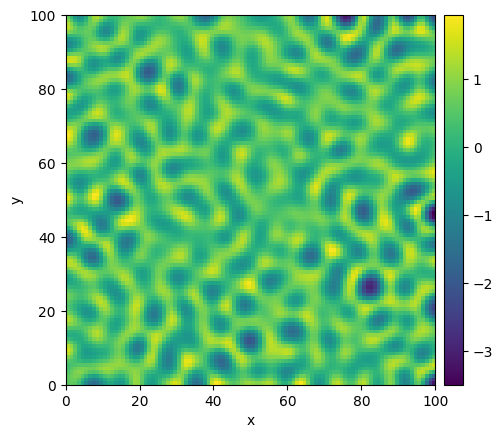

In [8]:
from pde import PDEBase, ScalarField, UnitGrid


class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation."""

    def evolution_rate(self, state, t=0):
        """Implement the python version of the evolution equation."""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2


grid = UnitGrid([100, 100])  # generate grid
#grid = UnitGrid(100)  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

eq = KuramotoSivashinskyPDE()  # define the pde
result = eq.solve(state, t_range=10, dt=0.01)
result.plot()

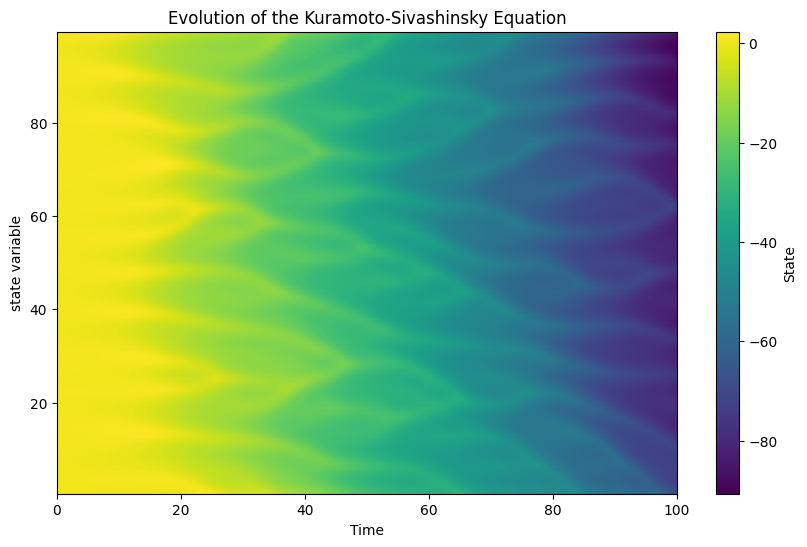

In [14]:
from pde import PDEBase, ScalarField, UnitGrid, PlotTracker, MemoryStorage
import numpy as np
import matplotlib.pyplot as plt

class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation."""

    def evolution_rate(self, state, t=0):
        """Implement the python version of the evolution equation."""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2

# Set up a 1D grid
grid = UnitGrid([100])  # 1D grid with 256 points

# Generate a random initial condition
state = ScalarField.random_uniform(grid)

# Define the PDE
eq = KuramotoSivashinskyPDE()

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while tracking the state at each step
eq.solve(state, t_range=100, dt=0.01, tracker=storage.tracker(0.1))

# Retrieve data from the storage
data = storage.data

# Convert the list of ScalarFields to a NumPy array for plotting
u_values = np.array([field.data for field in data])

# Create the imshow plot
plt.figure(figsize=(10, 6))
plt.imshow(u_values.T, extent=[0, 100, grid.axes_coords[0][0], grid.axes_coords[0][-1]],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='State')
plt.xlabel('Time')
plt.ylabel('state variable')
plt.title('Evolution of the Kuramoto-Sivashinsky Equation')
plt.show()

  0%|          | 0/100.0 [00:00<?, ?it/s]

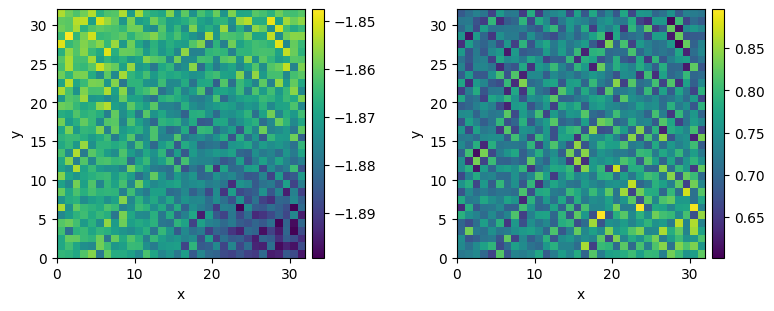

In [16]:
from pde import FieldCollection, PDEBase, UnitGrid


class FitzhughNagumoPDE(PDEBase):
    """FitzHugh–Nagumo model with diffusive coupling."""

    def __init__(self, stimulus=0.5, τ=10, a=0, b=0, bc="auto_periodic_neumann"):
        super().__init__()
        self.bc = bc
        self.stimulus = stimulus
        self.τ = τ
        self.a = a
        self.b = b

    def evolution_rate(self, state, t=0):
        v, w = state  # membrane potential and recovery variable

        v_t = v.laplace(bc=self.bc) + v - v**3 / 3 - w + self.stimulus
        w_t = (v + self.a - self.b * w) / self.τ

        return FieldCollection([v_t, w_t])


grid = UnitGrid([32, 32])
state = FieldCollection.scalar_random_uniform(2, grid)

eq = FitzhughNagumoPDE()
result = eq.solve(state, t_range=100, dt=0.01)
result.plot()

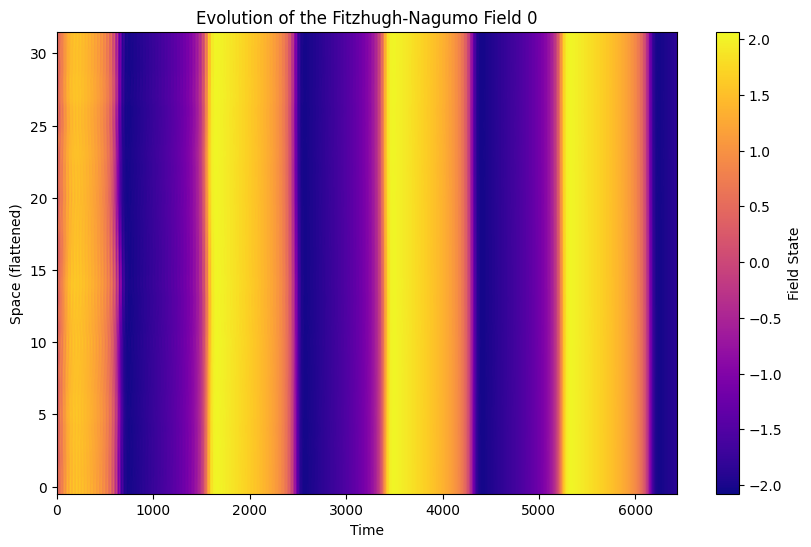

In [15]:
from pde import FieldCollection, PDEBase, ScalarField, UnitGrid, MemoryStorage
import numpy as np
import matplotlib.pyplot as plt

class FitzhughNagumoPDE(PDEBase):
    """FitzHugh–Nagumo model with diffusive coupling."""

    def __init__(self, stimulus=0.5, τ=10, a=0, b=0, bc="auto_periodic_neumann"):
        super().__init__()
        self.bc = bc
        self.stimulus = stimulus
        self.τ = τ
        self.a = a
        self.b = b

    def evolution_rate(self, state, t=0):
        v, w = state  # membrane potential and recovery variable

        v_t = v.laplace(bc=self.bc) + v - v**3 / 3 - w + self.stimulus
        w_t = (v + self.a - self.b * w) / self.τ

        return FieldCollection([v_t, w_t])

# Set up a 2D grid
grid = UnitGrid([32, 32])  # 2D grid with 32x32 points

# Generate random initial conditions for both fields
state = FieldCollection.scalar_random_uniform(2, grid)

# Define the PDE
eq = FitzhughNagumoPDE()

# Prepare storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while tracking the state at each step
eq.solve(state, t_range=100, dt=0.01, tracker=storage.tracker(0.5))

# Retrieve data from storage
data = storage.data

# Select which component to plot: 0 for v (membrane potential), 1 for w (recovery variable)
field_index = 0

# Convert the list of FieldCollections to a NumPy array for plotting
field_values = np.array([fields[field_index].data for fields in data])

# Create the imshow plot
plt.figure(figsize=(10, 6))
plt.imshow(field_values.transpose((1, 0, 2)).reshape(field_values.shape[1], -1), aspect='auto', origin='lower', cmap='plasma')
plt.colorbar(label='Field State')
plt.xlabel('Time')
plt.ylabel('Space (flattened)')
plt.title(f'Evolution of the Fitzhugh-Nagumo Field {field_index}')
plt.show()

In [19]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([64, 64])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
tracker = PlotTracker(interrupts=1, plot_args={"vmin": 0, "vmax": 5})
sol = eq.solve(state, t_range=20, dt=1e-3, tracker=tracker)

Spent more time on handling trackers (16.3) than on the actual simulation (8.06)


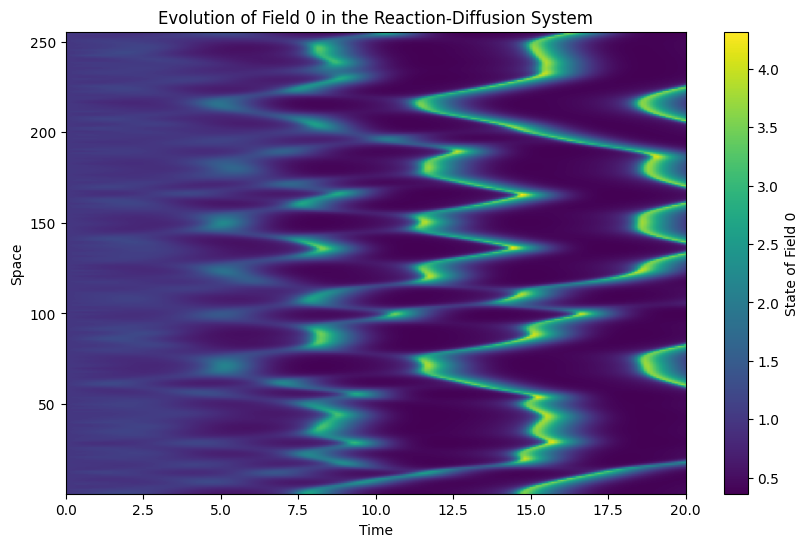

In [20]:
from pde import PDE, FieldCollection, MemoryStorage, ScalarField, UnitGrid
import numpy as np
import matplotlib.pyplot as plt

# Define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# Initialize state on a 1D grid
grid = UnitGrid([256])  # Use a 1D grid with 256 points
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Simulate the PDE
sol = eq.solve(state, t_range=20, dt=0.001, tracker=storage.tracker(0.1))

# Retrieve data from the storage
data = storage.data

# Select which component to plot: 0 for u, 1 for v
field_index = 0

# Convert the list of FieldCollections to a NumPy array for plotting
field_values = np.array([fields[field_index].data for fields in data])

# Create the imshow plot
plt.figure(figsize=(10, 6))
plt.imshow(field_values.T, extent=[0, 20, grid.axes_coords[0][0], grid.axes_coords[0][-1]],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label=f'State of Field {field_index}')
plt.xlabel('Time')
plt.ylabel('Space')
plt.title(f'Evolution of Field {field_index} in the Reaction-Diffusion System')
plt.show()

  0%|          | 0/5.0 [00:00<?, ?it/s]

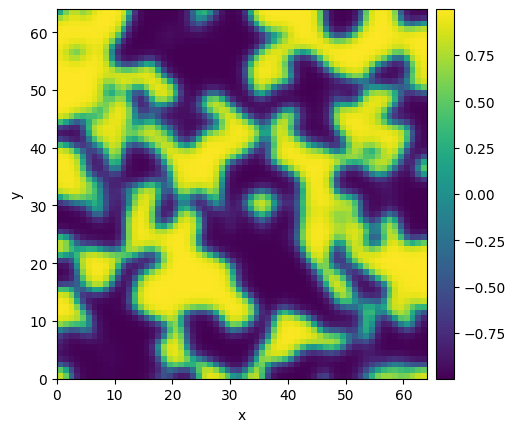

In [29]:
grid = pde.UnitGrid([64, 64])
field = pde.ScalarField.random_uniform(grid, -1, 1)

eq = pde.AllenCahnPDE(interface_width=0.5)
sol = eq.solve(field, t_range=5, dt=1e-3)
sol.plot(colorbar=True);

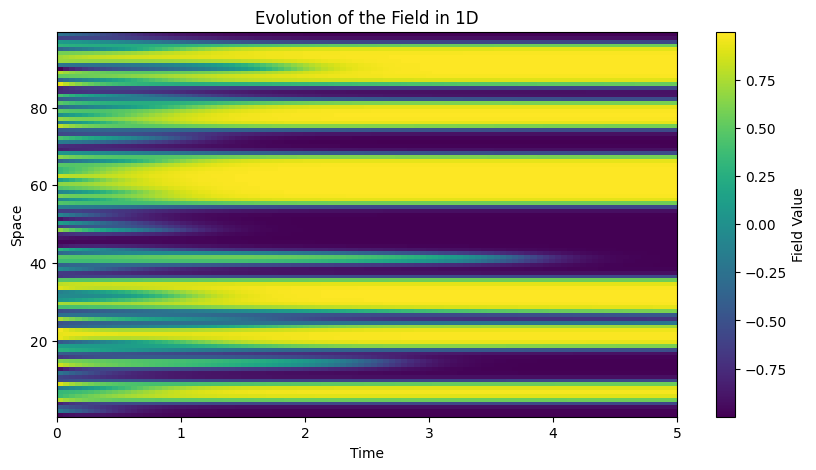

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from pde import UnitGrid, ScalarField, AllenCahnPDE, MemoryStorage

# Set the geometry to 1D
grid = UnitGrid([100])  # 1D grid with 64 points

# Initial condition as a random uniform distribution in 1D
field = ScalarField.random_uniform(grid, -1, 1)

# Define the Allen-Cahn equation
eq = AllenCahnPDE(interface_width=0.5)

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while storing the results at each time step
sol = eq.solve(field, t_range=10, dt=1e-3, tracker=storage.tracker(0.1))

# Extract data from storage
data = np.array([s.data for s in storage])

# Time points
time_points = np.linspace(0, 5, num=data.shape[0])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the imshow plot with time on the x-axis and space on the y-axis
# Note: 'extent' is [left, right, bottom, top]
c = ax.imshow(data.T, extent=[time_points.min(), time_points.max(), grid.axes_coords[0][0], grid.axes_coords[0][-1]],
              aspect='auto', origin='lower', cmap='viridis')

# Add a colorbar
fig.colorbar(c, ax=ax, label='Field Value')

# Label axes
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_title('Evolution of the Field in 1D')

# Show the plot
plt.show()


  0%|          | 0/10.0 [00:00<?, ?it/s]

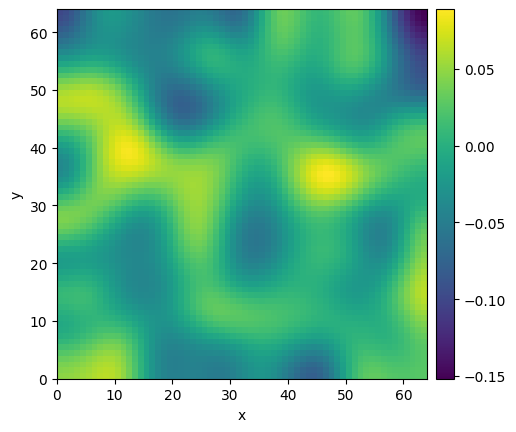

In [45]:
grid = pde.UnitGrid([64, 64])
field = pde.ScalarField.random_uniform(grid, -1, 1)

eq = pde.DiffusionPDE()
sol = eq.solve(field, t_range=10, dt=1e-3)
sol.plot(colorbar=True);

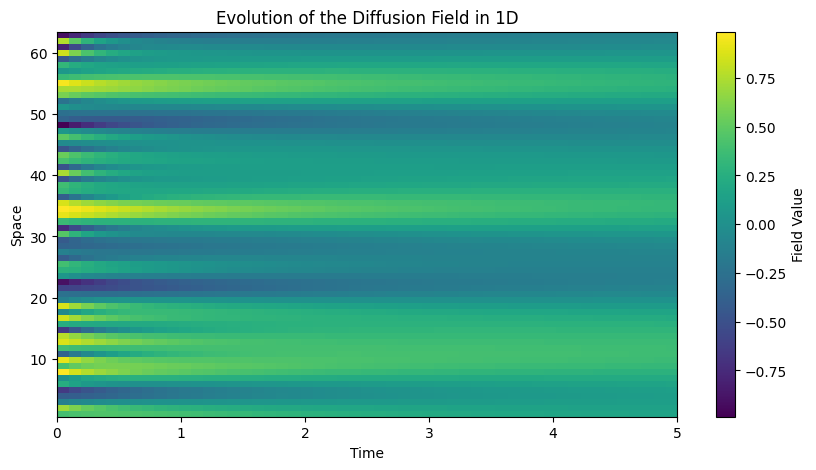

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pde import UnitGrid, ScalarField, DiffusionPDE, MemoryStorage

# Set the geometry to 1D
grid = UnitGrid([64])  # 1D grid with 64 points

# Initial condition as a random uniform distribution in 1D
field = ScalarField.random_uniform(grid, -1, 1)

# Define the Diffusion equation
eq = DiffusionPDE(diffusivity=1)  # default diffusivity

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while storing the results at each time step
sol = eq.solve(field, t_range=5, dt=1e-3, tracker=storage.tracker(0.1))

# Extract data from storage for plotting
data = np.array([s.data for s in storage])

# Time points
time_points = np.linspace(0, 5, num=data.shape[0])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data with imshow; configure the axes correctly
c = ax.imshow(data.T, extent=[time_points.min(), time_points.max(), grid.axes_coords[0][0], grid.axes_coords[0][-1]],
              aspect='auto', origin='lower', cmap='viridis')

# Add a colorbar to the plot
fig.colorbar(c, ax=ax, label='Field Value')

# Label the axes
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_title('Evolution of the Diffusion Field in 1D')

# Show the plot
plt.show()

  0%|          | 0/10.0 [00:00<?, ?it/s]

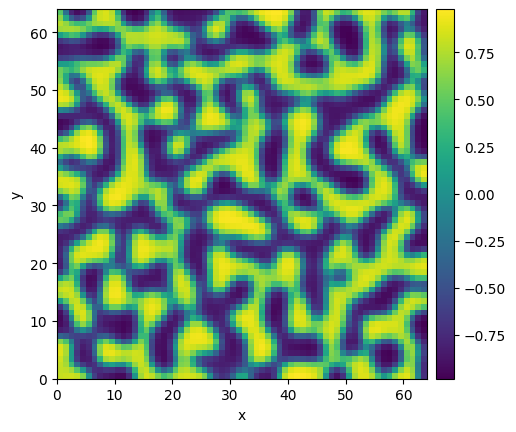

In [48]:
grid = pde.UnitGrid([64, 64])
field = pde.ScalarField.random_uniform(grid, -1, 1)

eq = pde.CahnHilliardPDE(interface_width=0.5)
sol = eq.solve(field, t_range=10, dt=1e-3)
sol.plot(colorbar=True);

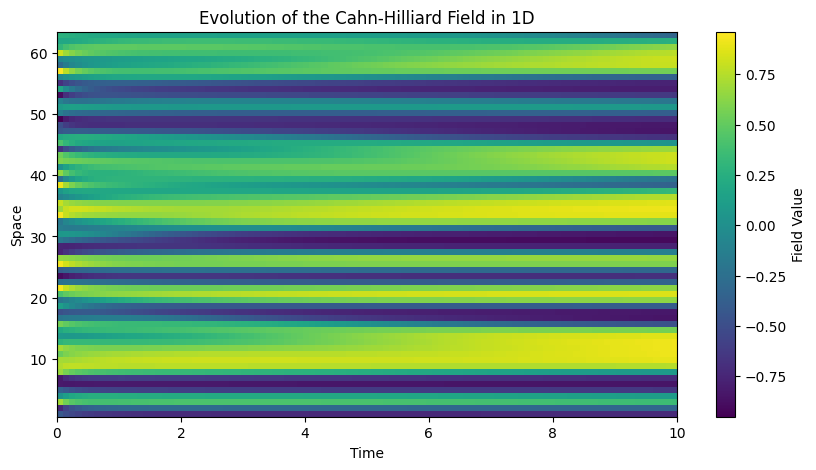

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from pde import UnitGrid, ScalarField, CahnHilliardPDE, MemoryStorage

# Set the geometry to 1D
grid = UnitGrid([64])  # 1D grid with 64 points

# Initial condition as a random uniform distribution in 1D
field = ScalarField.random_uniform(grid, -1, 1)

# Define the Cahn-Hilliard equation with a specified interface width
eq = CahnHilliardPDE(interface_width=0.5)

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while storing the results at each time step
sol = eq.solve(field, t_range=10, dt=1e-3, tracker=storage.tracker(0.1))

# Extract data from storage for plotting
data = np.array([s.data for s in storage])

# Time points
time_points = np.linspace(0, 10, num=data.shape[0])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data with imshow; configure the axes correctly
c = ax.imshow(data.T, extent=[time_points.min(), time_points.max(), grid.axes_coords[0][0], grid.axes_coords[0][-1]],
              aspect='auto', origin='lower', cmap='viridis')

# Add a colorbar to the plot
fig.colorbar(c, ax=ax, label='Field Value')

# Label the axes
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_title('Evolution of the Cahn-Hilliard Field in 1D')

# Show the plot
plt.show()


  0%|          | 0/100.0 [00:00<?, ?it/s]

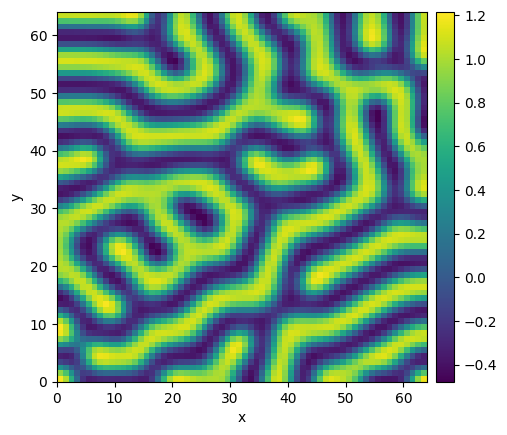

In [50]:
grid = pde.UnitGrid([64, 64])
field = pde.ScalarField.random_uniform(grid, -1, 1)

eq = pde.SwiftHohenbergPDE(rate=0.1, kc2=0.5, delta=1.0)
sol = eq.solve(field, t_range=1e2, dt=1e-2)
sol.plot(colorbar=True);

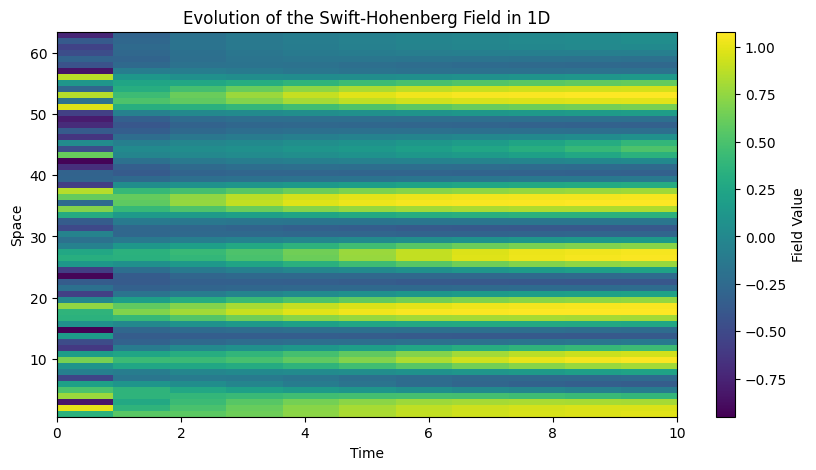

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from pde import UnitGrid, ScalarField, SwiftHohenbergPDE, MemoryStorage

# Set the geometry to 1D
grid = UnitGrid([64])  # 1D grid with 64 points

# Initial condition as a random uniform distribution in 1D
field = ScalarField.random_uniform(grid, -1, 1)

# Define the Swift-Hohenberg equation with given parameters
eq = SwiftHohenbergPDE(rate=0.1, kc2=0.5, delta=1.0)

# Prepare a storage to save the state over time
storage = MemoryStorage()

# Solve the PDE while storing the results at each time step
sol = eq.solve(field, t_range=10, dt=1e-3, tracker=storage.tracker(1))  # storing every 1 time unit for visibility

# Extract data from storage for plotting
data = np.array([s.data for s in storage])

# Time points
time_points = np.linspace(0, 10, num=data.shape[0])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data with imshow; configure the axes correctly
c = ax.imshow(data.T, extent=[time_points.min(), time_points.max(), grid.axes_coords[0][0], grid.axes_coords[0][-1]],
              aspect='auto', origin='lower', cmap='viridis')

# Add a colorbar to the plot
fig.colorbar(c, ax=ax, label='Field Value')

# Label the axes
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_title('Evolution of the Swift-Hohenberg Field in 1D')

# Show the plot
plt.show()

Explicit stepper with a fixed time step did not receive any initial value for `dt`. Using dt=0.001, but specifying a value or enabling adaptive stepping is advisable.
Spent more time on handling trackers (27.8) than on the actual simulation (14.5)


  0%|          | 0/100 [00:00<?, ?it/s]

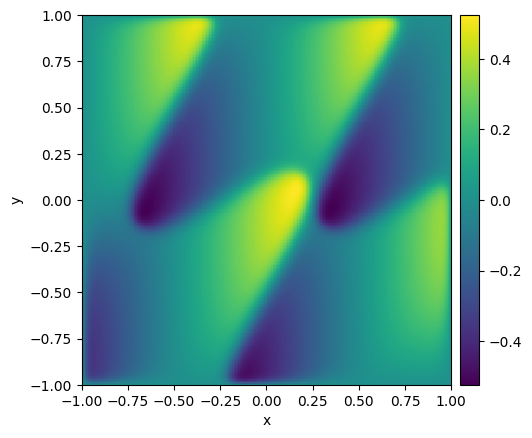

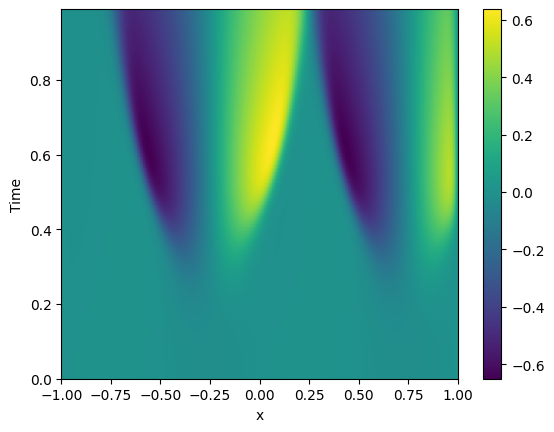

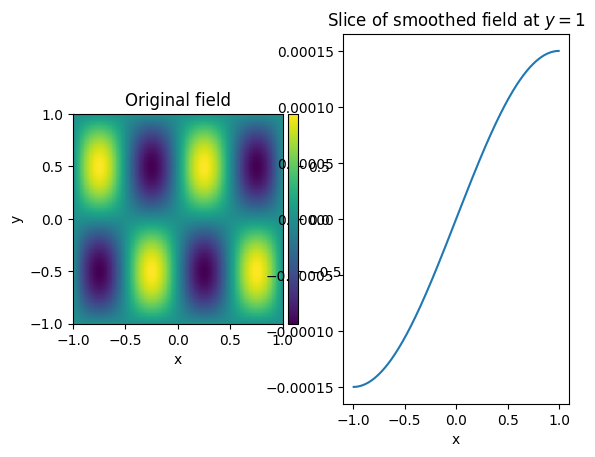

In [23]:
from math import sqrt,pi
import pde
from pde import WavePDE, CartesianGrid, ScalarField, MemoryStorage, FieldCollection, PDE, plot_kymograph, PlotTracker, plot_magnitudes, FileStorage
import matplotlib.pyplot as plt


#Set the Geometry
#Generate grid
grid = CartesianGrid( [[-1, 1],[-1,1]] , 256 )


#Initial condition
p=2
q=1
state = ScalarField.from_expression(grid, f"sin({p}*pi*x)*sin({q}*pi*y)" )

#Boundary condition
#specified within eq call
nu =0.01/pi
eq = PDE(
{
        "u": f"{nu} * (laplace(u)+laplace(u)) - u * (get_x(gradient(u))+get_y(gradient(u)))"
}, user_funcs={"get_x": lambda arr: arr[0], "get_y": lambda arr: arr[1]},
    
    bc={"value": 0}
 )

# store intermediate information of the simulation
storage = FileStorage("2D_burger_data.npz")

# solve the pde
result = eq.solve(state, t_range = 0.99, tracker=storage.tracker(0.01))

pde.movie(storage, filename="2D_burger_movie.mov")
# plot the resulting field
result.plot()

# visualize the result in a space-time plot
plot_kymograph(storage)

# slice data
data=state
smoothed = data.smooth()  # Gaussian smoothing to get rid of the noise
sliced = smoothed.slice({"y": 0})

# create two plots of the field and the modifications
fig, axes = plt.subplots(nrows=1, ncols=2)
data.plot(ax=axes[0], title="Original field")
sliced.plot(ax=axes[1], title="Slice of smoothed field at $y=1$")
plt.subplots_adjust(hspace=1.5)